# Python Scientific Computation Worksheet

This worksheet is intended to be a hands-on tutorial about using the `numpy`, `pandas`, and `matplotlib` packages using a somewhat familiar data set, called `mpg.csv` (having very similar data to `mtcars`). Let's get to it!

## Plotting
Of course, since we're using these packages, we should load them up first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, we need to get our data into Python. Luckily, `pandas` provides a nice `read_csv()` function that does it for us, much the same as in `R`. (Note that `pd.to_csv()` writes out a csv).

In [4]:
mpg_data = pd.read_csv("mpg.csv")
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Let's do similar analysis as we did with the `mtcars` dataset. 

**Exercise**. First, let's look at how mpg is affected by the horsepower by plotting a *scatter* plot. Afterwards, can you find a way to color the points by the number of cylinders? (feel free to peek at the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) documentation). Be sure to label your axes! Your plot should look like the one below.

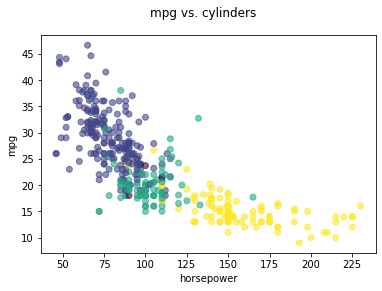

In [21]:
fig, ax = plt.subplots(1, 1)

ax.scatter(mpg_data.horsepower, mpg_data.mpg, c = mpg_data.cylinders, alpha = 0.6)
ax.set(xlabel="horsepower", ylabel="mpg")
fig.suptitle("mpg vs. cylinders")

plt.savefig("figs/exercise1.png")

### Plotting with seaborn

You might notice there's not a convenient way to add a legend to this figure. Here's where the `seaborn` package comes in, which makes prettier plots with more control over the figure. As always, install the package and load it as usual.

In [22]:
import seaborn as sns  # sns is standard

Here's how you make a scatter plot with seaborn:

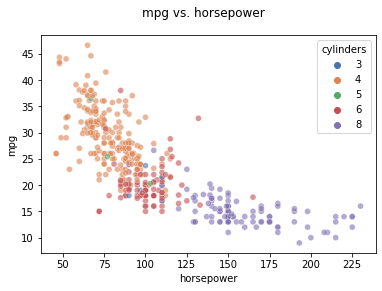

In [41]:
fig, ax = plt.subplots(1, 1)

sns.scatterplot(
    x = mpg_data.horsepower,  # x-axis
    y = mpg_data.mpg, # y-axis
    hue = mpg_data.cylinders, # color/fill
    palette = "deep",  # color palette
    legend = "full",  # show the legend
    alpha = 0.6,  # transparency
    ax = ax  # optional -- helpful for when you're plotting more than 1 subplot
)

fig.suptitle('mpg vs. horsepower')  # set title


plt.show()

Notice that:
1. the axes are labelled by themselves (based on the name of the columns).
2. the legend is just one option in the scatter.
3. you can specify the colors easily.

**Exercise**. Do the following:
1. Set up a 1 x 2 plot window (i.e. 2 plots side by side).
2. In the first plot window, use `seaborn` to plot the distribution of `acceleration` (what kind of plot should you use?).
3. In the second plot window, use `seaborn` to plot violin plots of `acceleration` by `origin` (a violin plot is basically a histogram that also shows you the densities).
4. What can you conclude about car manufacturers? Are there other factors other than origin that could contribute to acceleration distributions that we see?

As always, go look up the API if you don't know the exact names or options!

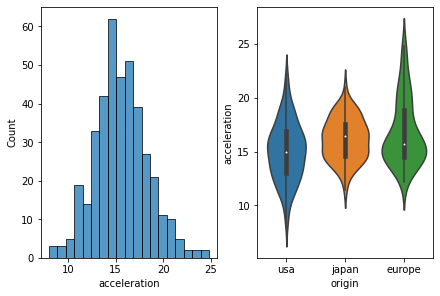

In [51]:
fig, ax = plt.subplots(1, 2, constrained_layout = True)


sns.histplot(
    x = mpg_data.acceleration,
    ax = ax[0]
)

sns.violinplot(
    y = mpg_data.acceleration,
    x = mpg_data.origin,
    ax = ax[1]
)

plt.show()

## Additional Scientific Packages
One super-duper package to know is `scipy`. It's a pretty big collection of modules used for scientific and mathematical computation. In particular, we're interested in `scipy.stats` to do some simple analysis. As always, let's load it in:

In [53]:
from scipy import stats

One useful part of this package is that it can calculate correlations for you. As a review, pearson correlation tests the linearity of two variables, and spearman correlation test whether an increase in the value of one variable causes a predictable change in another, regardless of linearity (see the R review for a bit more info).

To calculate the correlation coefficients, you need two paired, list-like items of the same length. For example, let's calculate the correlation between `mpg` and `horsepower`:

In [82]:
pearson_r = stats.pearsonr(mpg_data.mpg, mpg_data.horsepower)
spearman_r = stats.spearmanr(mpg_data.mpg, mpg_data.horsepower)

# note that the correlation functions return a correlation coefficient and a p value
print(f"Pearson r: {pearson_r[0]} with p={pearson_r[1]}")
print(f"Spearman r: {spearman_r[0]} with p={spearman_r[1]}")

ValueError: array must not contain infs or NaNs

Oops! It looks like we have NaNs in the data. There's a lot of approaches to dealing with NaN values in data science, but the most-common way to manage them is to simply delete the observations with NaNs.

**Exercise**. Make a copy of `mpg_data` called `mpg_noNAN`, where every row with a NaN value is removed. Hint: you want to use the `pd.isna()` function, boolean indexing with `loc`, and some boolean arithmetic. Afterwards, find the correlations with the fixed data!

In [144]:
mpg_noNAN = mpg_data.loc[pd.isna(mpg_data).sum(axis=1) == False, ]

pearson_r = stats.pearsonr(mpg_noNAN.mpg, mpg_noNAN.horsepower)
spearman_r = stats.spearmanr(mpg_noNAN.mpg, mpg_noNAN.horsepower)

round_sig = lambda f: float(('%.' + str(2) + 'e') % f)

print(f"Pearson r: {round_sig(pearson_r[0])} with p={round_sig(pearson_r[1])}")
print(f"Spearman r: {round_sig(spearman_r[0])} with p={round_sig(spearman_r[1])}")

Pearson r: -0.778 with p=7.03e-81
Spearman r: -0.854 with p=1.62e-112


Note that your correlations/significances are probably really long numbers when you print them -- you can use the `round(x, i)` function to round to the $ i^{th} $ digit, though if you try applying that to the p-value you'll see 0. Unfortuantely, I haven't yet found a simple way to round really small values properly (without doing annoying stuff like string formatting, which is what I did for the solution).

## Worksheet Portion

Here's a few exercises to get you more practice with dataframes, plotting, and rudimentary stats. I would advise you to write these in a jupyter notebook so you can get immediate feedback on the code you're writing, and transfer the completed code to a python script to run all by itself to make sure the code works.

0. Explore the data however you want. 
1. Plot the distribution of mileage (mpg) on its own in a histogram next to a box/violin plot (feel free to choose). Use the function `plt.savefig(DIR/TO/FILENAME)` to save the plot as a `.png`. 
2. We saw earlier that there seems to be an association between the number of cylinders, mpg, and horsepower. Do the following:

    a. Create a box/violin plot of `mpg` and `horsepower`, with `cylinder`s on the x-axis (i.e. partitioning the data by cylinders). What trends do you see?
    b. Find the pairwise Spearman correlations (i.e. find the correlations between mpg/horsepower, horsepower/cylinder, mpg/cylinder) using the `stats` package. Then modify the origin plots such that the Spearman correlation is part of the title (e.g. put `(spearman rho = ...)` somewhere in there). You might want to use the `round()` function to make things easier to read.
    c. Can you conclude that there is some relationship between these variables? Can you say that having more cylinders *causes* a car to gain/lose mileage?
    
3. Let's now investigate how year affects mileage.
    a. Create a scatter plot of mpg vs. model_year (using either seaborn or matplotlib). Do you see any trends? Is this an appropriate plot? If not, remake it using a more appropriate plot type.
    b. Now, color the plot by weight. What other trends can you see (in both weight and mpg as the year increases)?
    c. Test your hypotheses in two ways: 
        (1) calculate the (Pearson) correlations between mpg/weight and year
        (2) use the `stats.ttest(samp1, samp2, equal_var=False)` function to perform a t-test comparing the cars' mileages/weights manufactured in the first and last years in the data set.
    Do these results support your hypotheses? Again, what conclusions can you make?
       
4. Create a plot showing the number of cars each nation makes each year. It should look something like the folowing figure. There's a "pythonic way" to do this using a few pandas/python-specific functions, but it's also very doable using a few for loops. Also remember that you can plot multiple lines on the same plot.


Ttest_indResult(statistic=-10.115276975545022, pvalue=2.1044698921606686e-14)
Ttest_indResult(statistic=5.385838712071263, pvalue=4.302130973800119e-06)


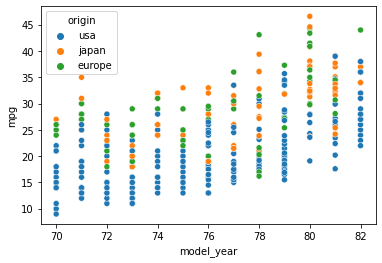

In [171]:
# put code here to begin

sns.scatterplot(x = mpg_data.model_year, y = mpg_data.mpg, hue = mpg_data.weight)

old_cars = mpg_data.loc[mpg_data.model_year == 70]
new_cars = mpg_data.loc[mpg_data.model_year == 82]

print(stats.ttest_ind(old_cars.mpg, new_cars.mpg, equal_var=False))
print(stats.ttest_ind(old_cars.weight, new_cars.weight, equal_var=False))

<AxesSubplot:>

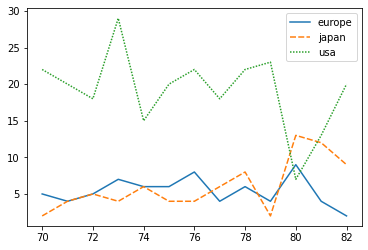

In [228]:
tabs = [y for x, y in mpg_data.groupby('origin', as_index=False)]
counts = [x.model_year.value_counts() for x in tabs]
for i, c in enumerate(counts):
    c.name = tabs[i].origin.iloc[0]
    
counts = pd.DataFrame(counts)

sns.lineplot(data=counts.T)